### Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import sweetviz as sv
from summarytools import dfSummary

In [2]:
df1=pd.read_csv('master.csv')

#### Sanity Checks

In [3]:
df1.shape

(27820, 12)

In [4]:
df1.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
df1[df1.duplicated()].shape 

(0, 12)

In [6]:
df1.dropna(how='all',inplace=True)

In [7]:
df1.shape

(27820, 12)

In [8]:
df1.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [9]:
df1.tail(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


#### Pre-Processing the data

In [11]:
(df1['country'].astype(str)+df1['year'].astype(str)==df1['country-year'].astype(str)).value_counts()

True    27820
dtype: int64

In [12]:
df1.sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
df1.replace({'sex': {'female': True,'male': False}},inplace=True)

In [14]:
(
    df1
    .drop(
        columns=[
            'country-year',
        ],
        inplace=True,)
)
(
    df1
    .rename(
        columns={
                'sex':'female',
                'population':'pop',
                'suicides_no':'target_suicides_no',
                'suicides/100k pop':'Suicides_per_100k_pop',
                'HDI for year':'hdi_for_year',
                ' gdp_for_year ($) ':'gdp_for_year',
                'gdp_per_capita ($)':'gdp_per_cap',
                'generation':'pop_generation',
        },inplace=True)
)

In [15]:
df1['gdp_for_year']=df1['gdp_for_year'].str.replace(',','').astype(np.int64)

In [16]:
df1.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [17]:
df1['age']=(
                pd.Categorical(
                        values=df1['age'],
                        categories=
                        [
                        '5-14 years',
                        '15-24 years',
                        '25-34 years',
                        '35-54 years',
                        '55-74 years',
                        '75+ years',
                        ],
                        ordered=True,
                    )
                )

In [18]:
df1.pop_generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [19]:
# Info from Google
# G.I. Generation -> 1901-1927
# Silent -> 1928-1945
# Boomers -> 1946-1964
# Generation X -> 1965-1980
# Millennials -> 1981-1996
# Generation Z -> 1997-2012

In [20]:
df1['pop_generation']=df1['pop_generation'].str.replace('Millenials','Millennials')
df1['pop_generation']=(
                pd.Categorical(
                        values=df1['pop_generation'],
                        categories=[
                            'G.I. Generation',
                            'Silent',
                            'Boomers',
                            'Generation X',
                            'Millennials',
                            'Generation Z',
                        ],
                        ordered=True,
                    )
                )

In [21]:
df1.sample(n=6)

,country,year,female,age,target_suicides_no,pop,Suicides_per_100k_pop,hdi_for_year,gdp_for_year,gdp_per_cap,pop_generation
27722,Uzbekistan,2003,False,5-14 years,45,3219722,1.40,NaN,10128112401,441,Millennials
20663,Romania,1994,False,35-54 years,993,2872400,34.57,NaN,30074440483,1406,Boomers
17563,New Zealand,1994,True,25-34 years,23,294100,7.82,NaN,55154160816,16615,Boomers
24842,Switzerland,2004,True,25-34 years,34,504589,6.74,NaN,394163688621,56123,Generation X
9390,France,2010,True,75+ years,464,3538923,13.11,0.881,2642609548930,44747,Silent
20675,Romania,1995,False,75+ years,99,313200,31.61,0.690,37662075750,1756,G.I. Generation


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                27820 non-null  object  
 1   year                   27820 non-null  int64   
 2   female                 27820 non-null  bool    
 3   age                    27820 non-null  category
 4   target_suicides_no     27820 non-null  int64   
 5   pop                    27820 non-null  int64   
 6   Suicides_per_100k_pop  27820 non-null  float64 
 7   hdi_for_year           8364 non-null   float64 
 8   gdp_for_year           27820 non-null  int64   
 9   gdp_per_cap            27820 non-null  int64   
 10  pop_generation         27820 non-null  category
dtypes: bool(1), category(2), float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [23]:
df1.isnull().sum()

country                      0
year                         0
female                       0
age                          0
target_suicides_no           0
pop                          0
Suicides_per_100k_pop        0
hdi_for_year             19456
gdp_for_year                 0
gdp_per_cap                  0
pop_generation               0
dtype: int64

#### Generating Descriptive Statistics

In [24]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,country[object],1. Mauritius2. Austria3. Netherlands4. Iceland5. Brazil6. Singapore7. Ecuador8. Spain9. Puerto Rico10. Mexico11. other,"382 (1.4%)382 (1.4%)382 (1.4%)382 (1.4%)372 (1.3%)372 (1.3%)372 (1.3%)372 (1.3%)372 (1.3%)372 (1.3%)24,060 (86.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpUlEQVR4nO3cwW0bVxhG0Z+E4ISbIQgBKkMFqIgUmyJYgPoQBM3CdLxhFgYMb7IjLyP6nAKIWVw8YQbv0+Z8Pg8Utrd+AH4fYiMjNjJiIyM2MmIjIzYyYiMjNjKbmdnNzJeZ+X4+n083fh7u2MPj4+Nfy7Ic1nV932w2fwuOa9kuy3J4fn6eZVkO8+OEg6vYzszsdrt/bv0g3D8vCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY7M3M6nf649YNw/7brur6/vr7Ouq7vM/P91g/E/bJBILPxL7OoONnIWFeRsa4iY11FxkddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyLgWTsbghYyTjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa+FkDF7IeEEg488oGesqMtZVZKyryHhBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxr4WSsq8g42cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuBZOxuCFjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryNggkLGuIuNkI2NdRca6iox1FRkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWjgZgxcyTjYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyroWTsa4i42QjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNaOBmDFzK/nmzwq4v/pfs5eLnkj/L5XWMA9bAsy+Hl5eW03++/XepH+dw+Pj7+PB6Ph7e3ty8zc7nYZmb2+/23p6enr5f6Ue7C7tI/6KMuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmYeZH1dKbv0g/H9cq4eHdV3fj8fjYa5wpYTP6xoDKNfC+S8XvxZu8ELGCwIZsZERGxmxkREbGbGRERsZsZERG5l/Absnt8W45yKWAAAAAElFTkSuQmCC"">",0(0.0%)
2,year[int64],Mean (sd) : 2001.3 (8.5)min < med < max:1985.0 < 2002.0 < 2016.0IQR (CV) : 13.0 (236.3),32 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3dTW7aQBiA4W9KCOanthAR7LhApS5YetMb9LDddhckuAA3YIOQkDHCjYX56SaoqFIgY2P5w36f/TCWeBOPxyNhTqeTAFp8KfoCgEtPRV9AWRhjmiLynHL47nQ6vT3SvHkhyDswxjR7vd5P13W7acZvNpvAGPPLNo6s867X660x5reIxCmG5xIzQd7Hs+u6Xd/33zzPs/pywzB0xuNxf7VavRhjNpbzup1Op+/7/sZ23sVi8XU6nf4YDocvtVrNOsi0f0S3EOSFDLc/93g81j3PC/r9/h+bgVEU1ZMk+T4cDmu2YSRJ4hwOh2+NRuPVdt4gCJqO47RGo1E8GAwCm7FhGDqTyaS7Wq2eRYQg85Dl9ncOI47jVxGxCmO32z2lDWM+n3dns1lrv9/XrC74Qrvdjm1jftdMO+c1BPlP6ttuUWEEQZBLFEUiyP94nkcYn3A4HOoi4hpj0gz/8IGodEFmXQfe+3rKKMu6V+T6A1GpgixqHVg1Wda9tx6IShWkFLwOrJo8HojKFqSIsA58ZLzLhioECVUIEqpcXUOW7SQJ9PswyKJOsJznFvYSK+naf8hMJ1jSvnxnL7Habm77pNlCeZd2G4W9xApTuw/JXmI15RZkhpfvrAMrLJcg73HolHVgNeUSZNGHTvG4cl1DcugUtnhTA1UIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVCFIqEKQUIUgoQpBQhWChCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChys2fBQnD0LH90O1264iIRFHkLJfLFmMZe3arp79tjJf23W3JMgAAAABJRU5ErkJggg=="">",0(0.0%)
3,female[bool],1. False2. True,"13,910 (50.0%)13,910 (50.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBNxD9wROi96zgYy6GBL/QWjNAIZjZ3cxuow+Z0Ku19hh9xEziuq5fKaVl9CGzqbWeIYRvgntfTCkt+74/cs7P0cfM4rquz1LKchzHzcyI7U3RzCzn/Ny27Wf0MZO5jz5gNh+jD8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sYcPQhM+F5+cRa61lKWYyPAbvUWk8ze42+YyYMXvwYvHQKTPmgwpvNjzdbJ6Z8Tkz5+jHlc2DK58OUz49f7534UxcyxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yDDlc+B5+TDlc2LK14/Bix+Dl06/fpBq344fqoAAAAAASUVORK5CYII="">",0(0.0%)
4,age[category],1. 15-24 years2. 35-54 years3. 75+ years4. 25-34 years5. 55-74 years6. 5-14 years,"4,642 (16.7%)4,642 (16.7%)4,642 (16.7%)4,642 (16.7%)4,642 (16.7%)4,610 (16.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAA

In [25]:
df1_report=sv.analyze(df1)

                                             |      | [  0%]   00:00 -> (? left)


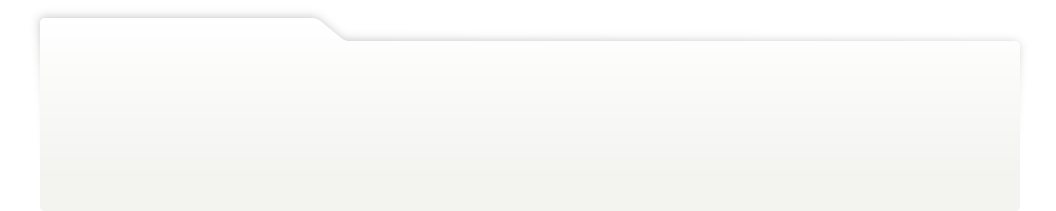
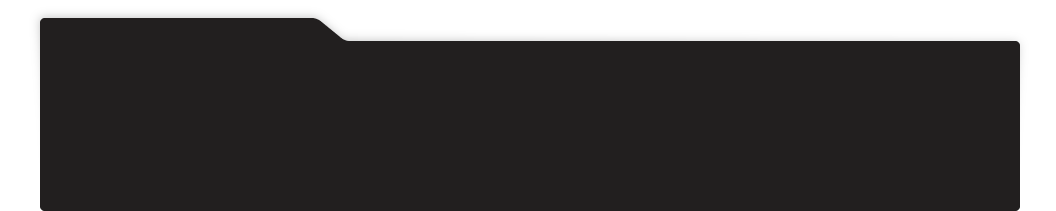
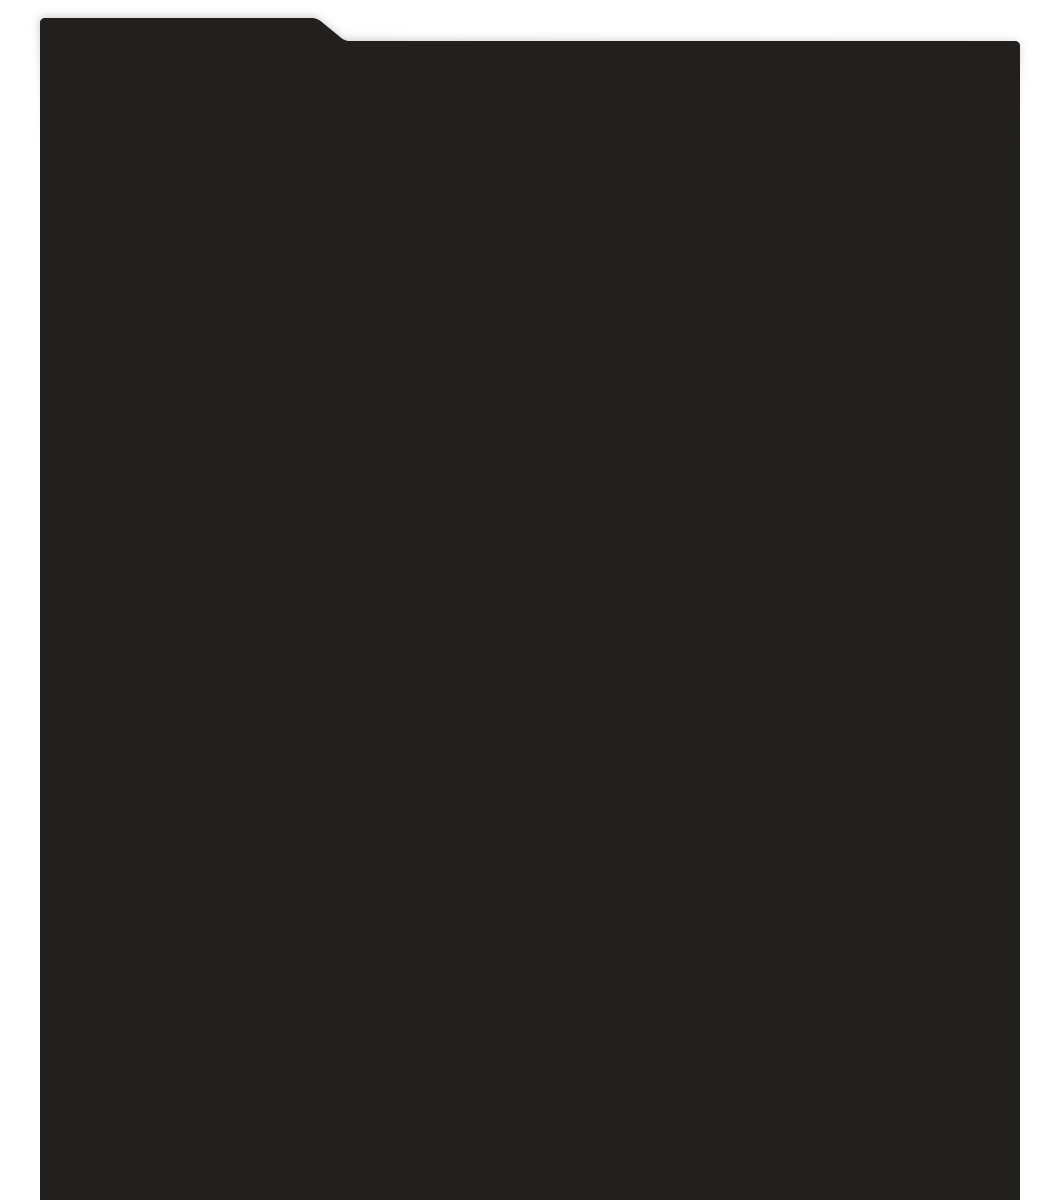
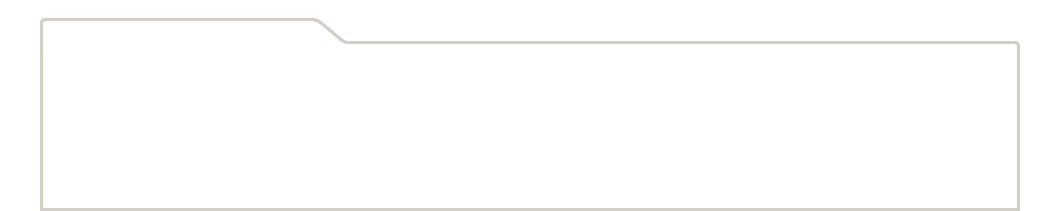
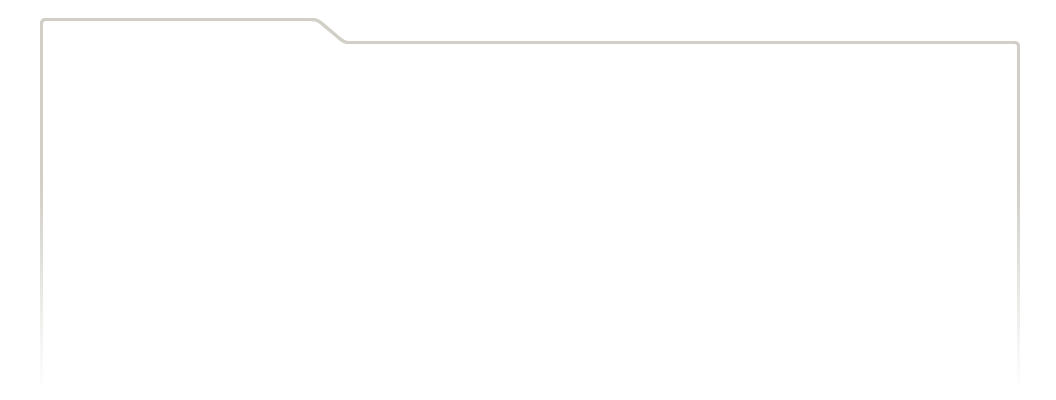
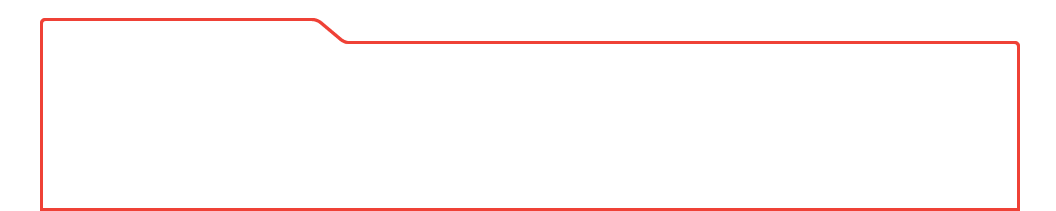
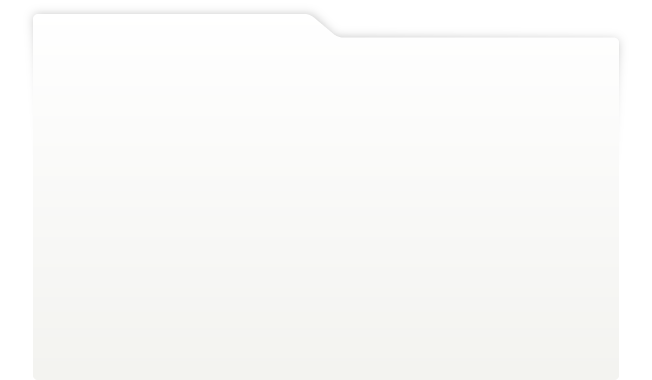
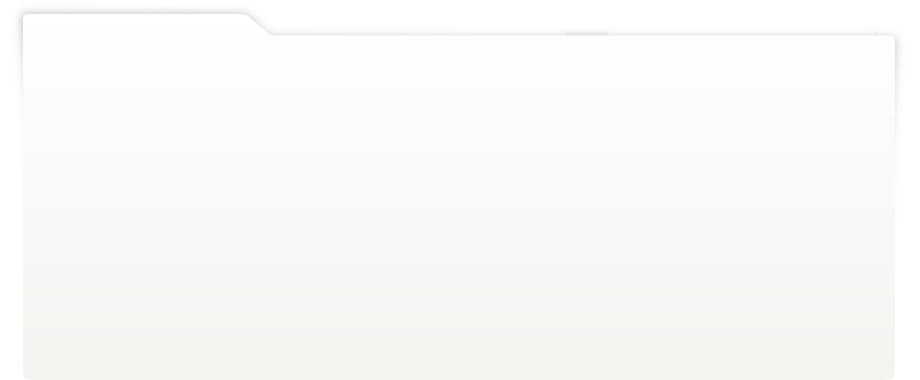
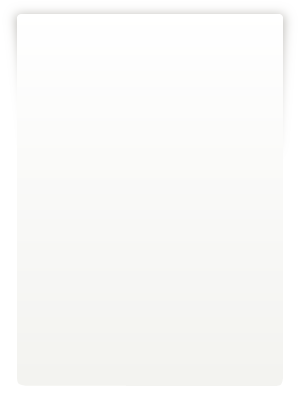
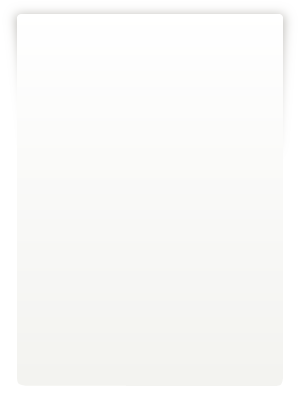
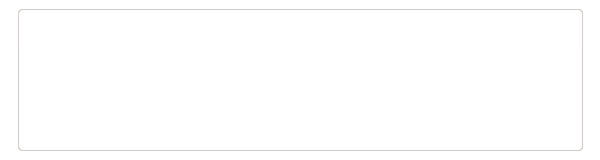
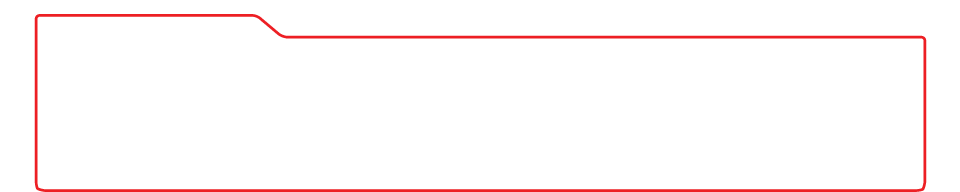
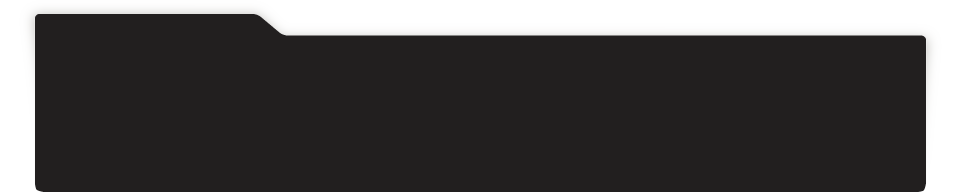
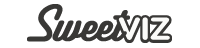
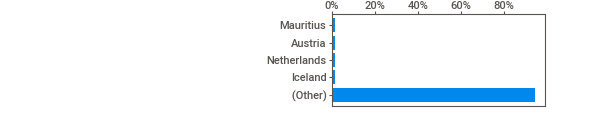
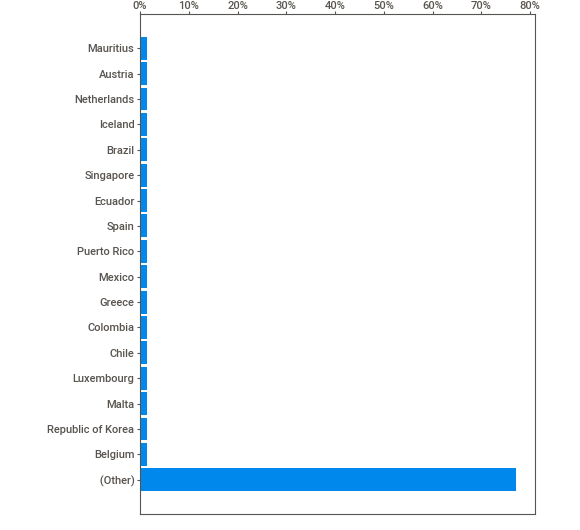
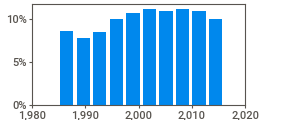
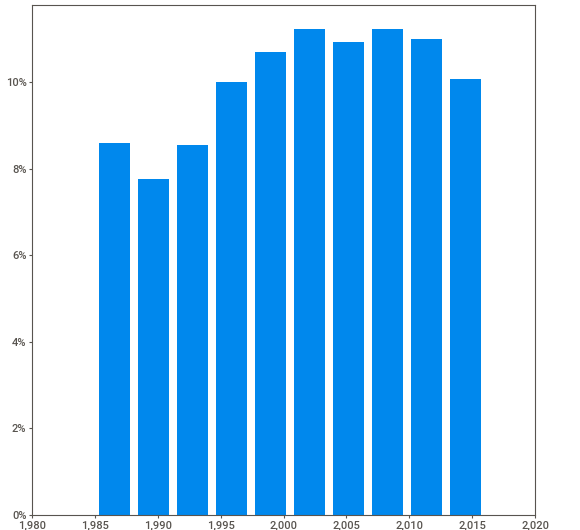
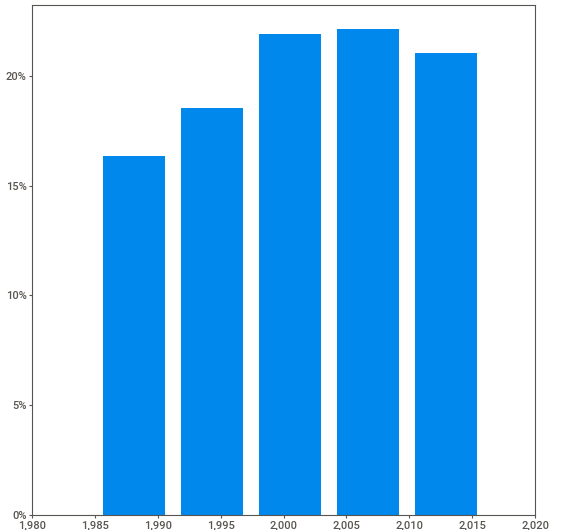
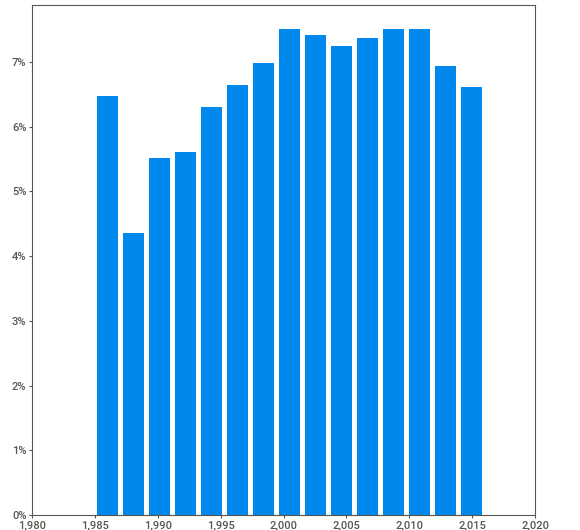
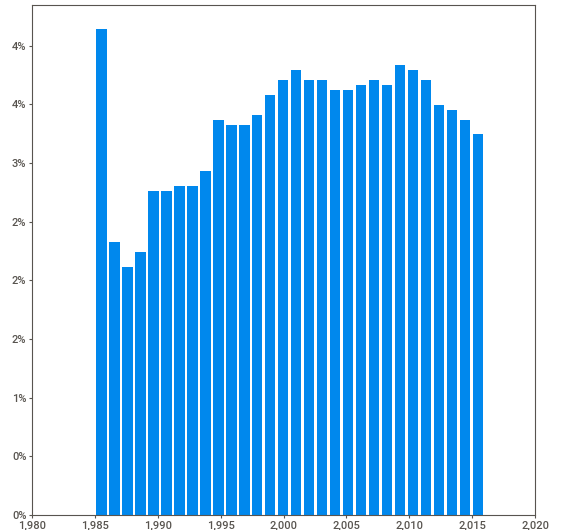
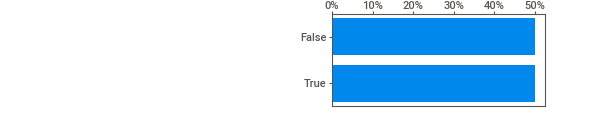
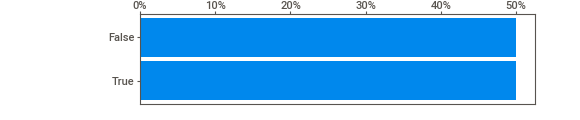
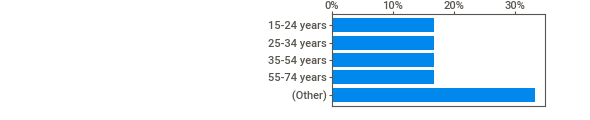
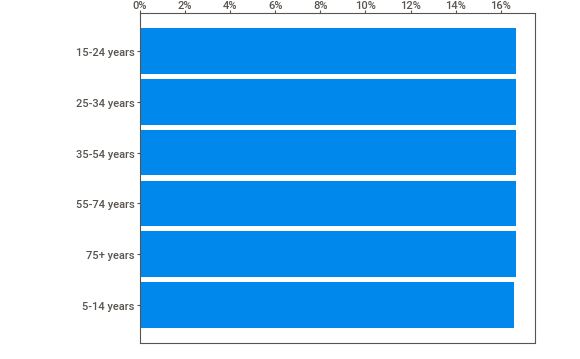
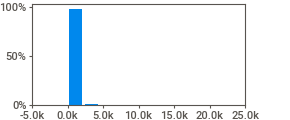
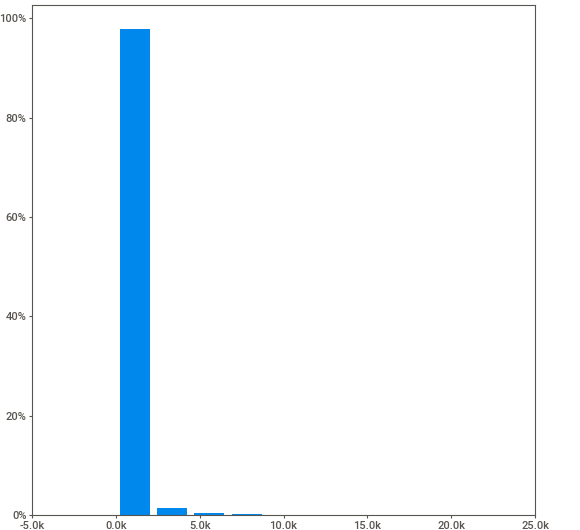
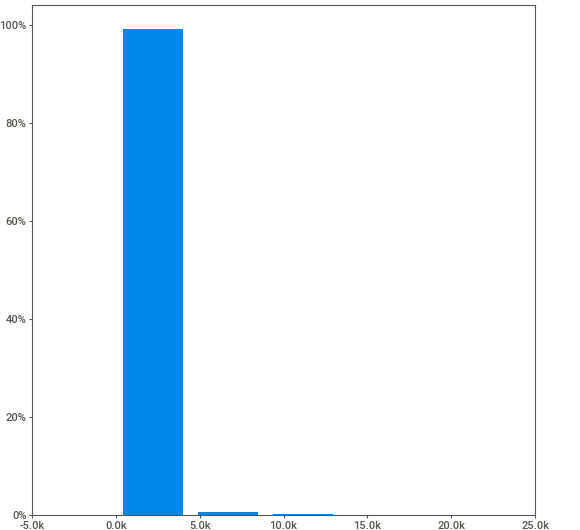
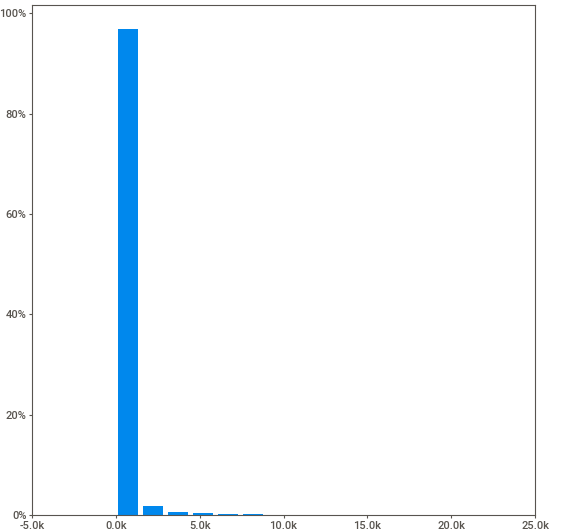
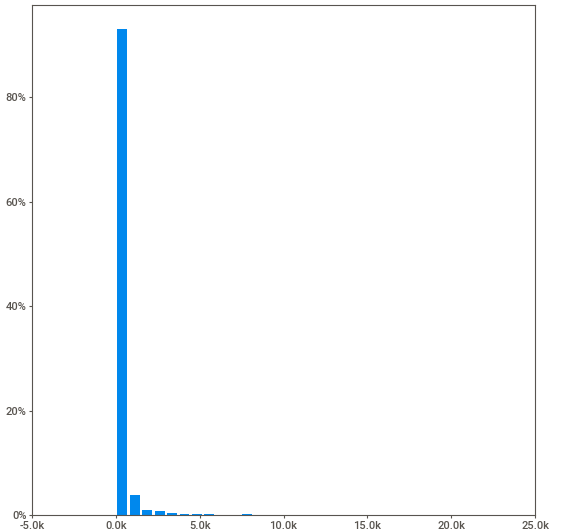
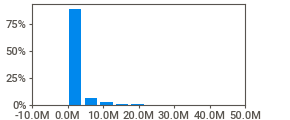
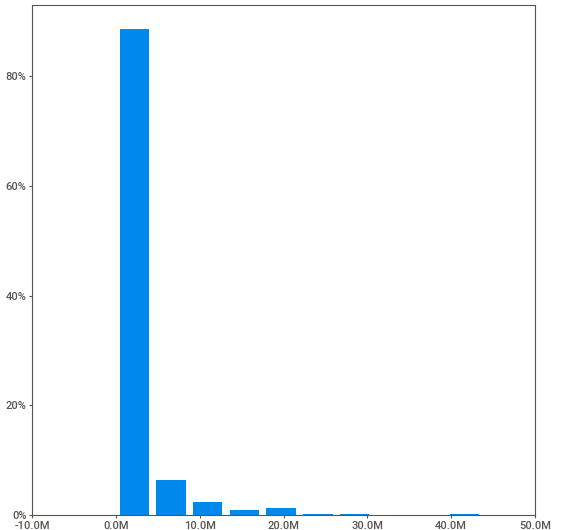
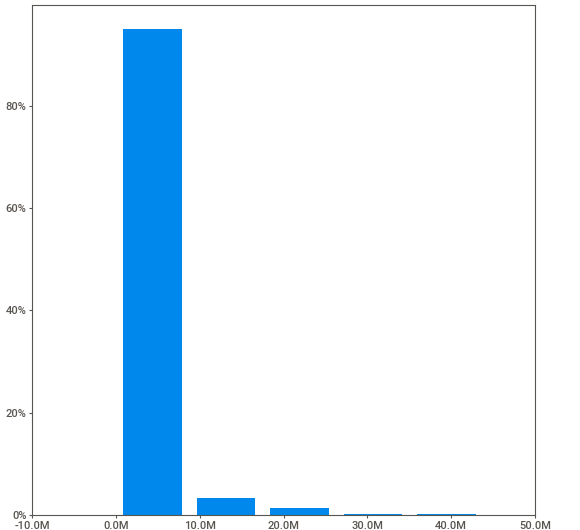
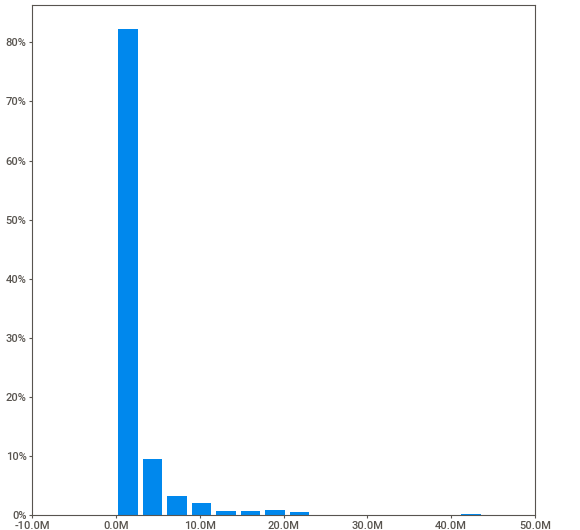
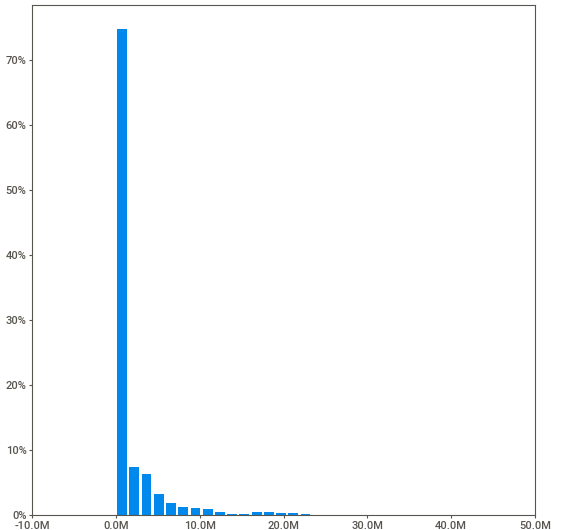
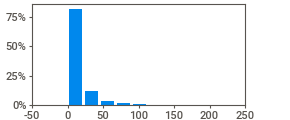
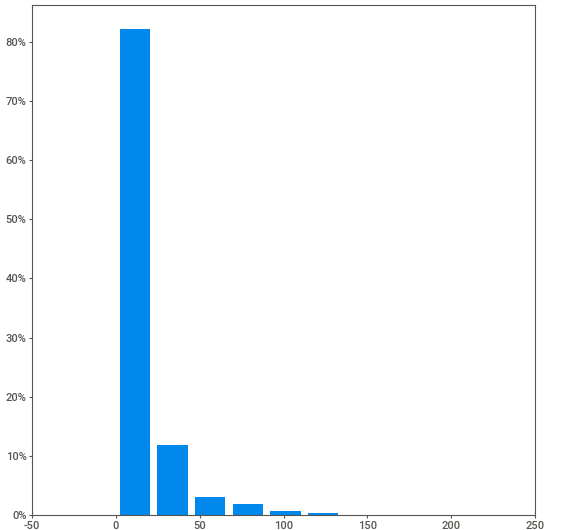
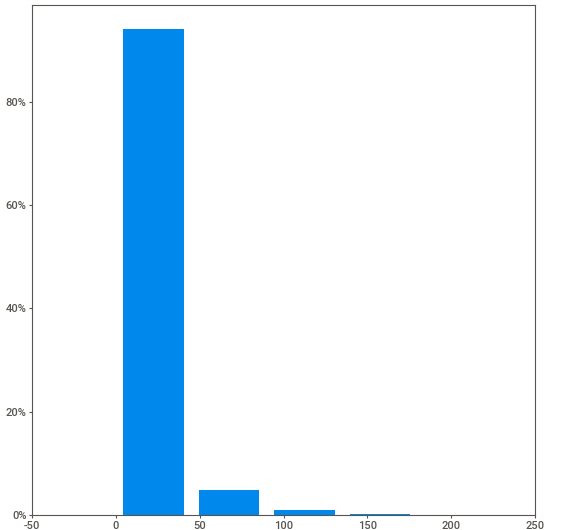
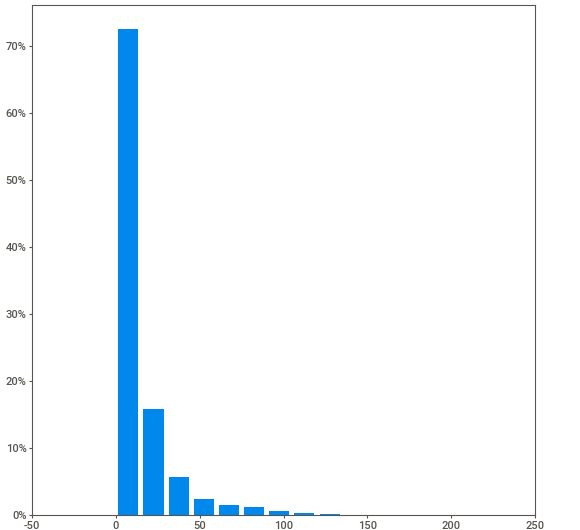
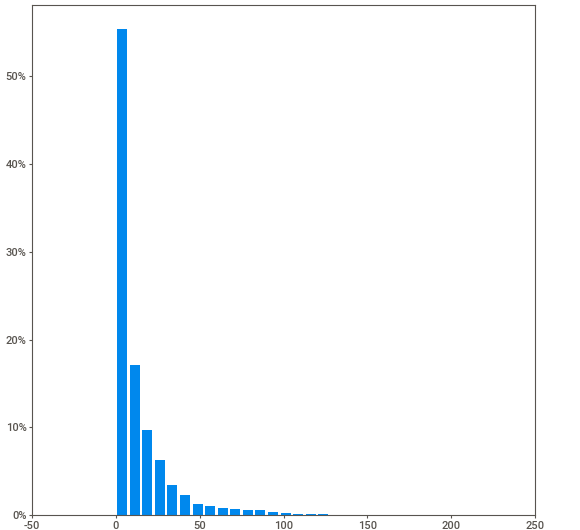
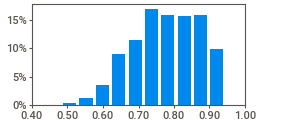
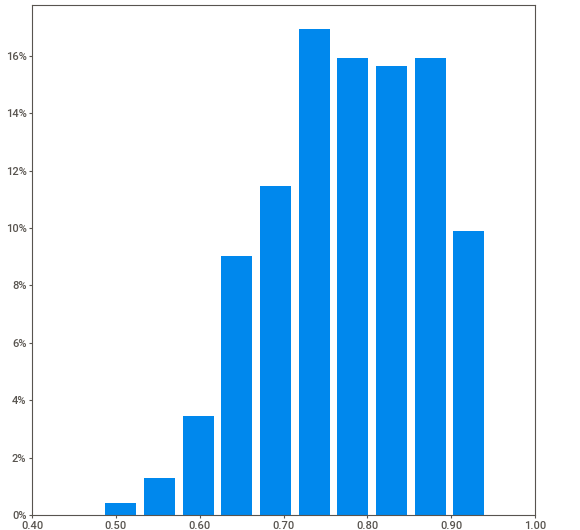
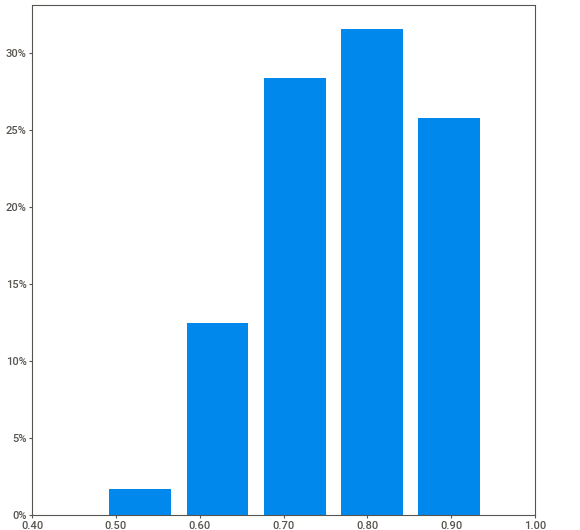
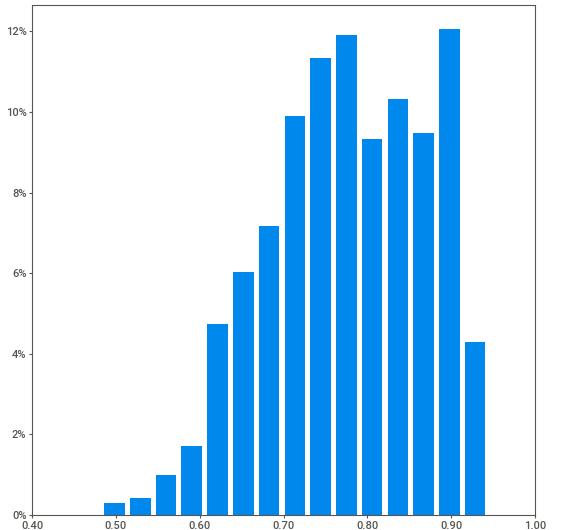
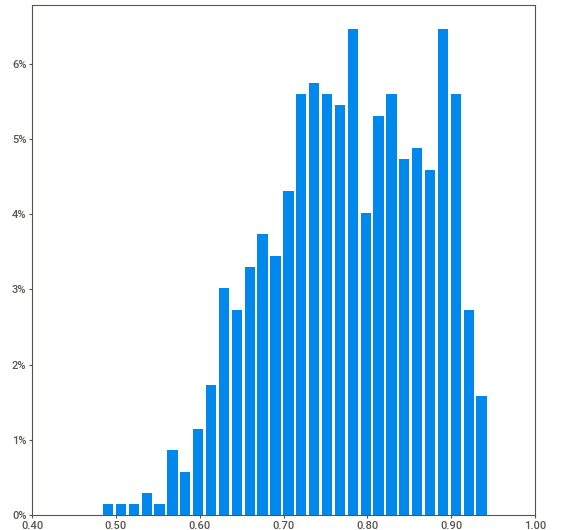
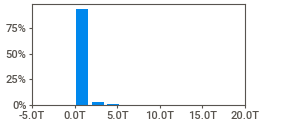
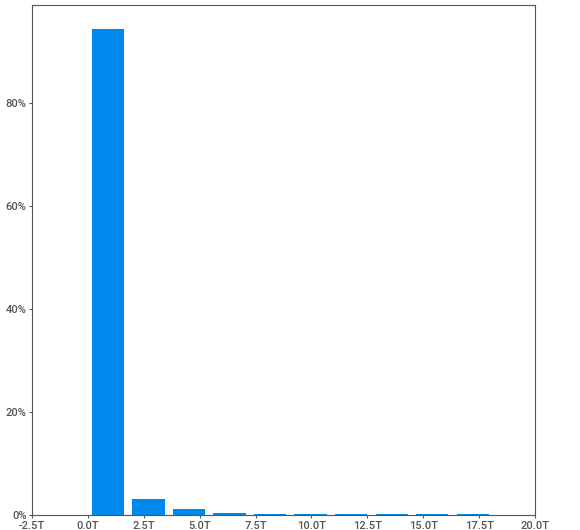
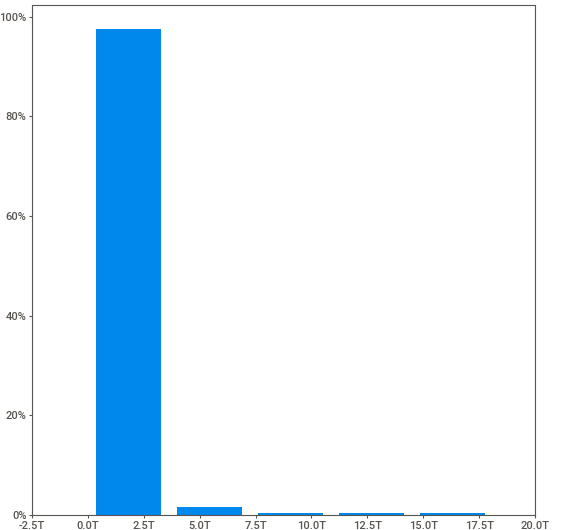
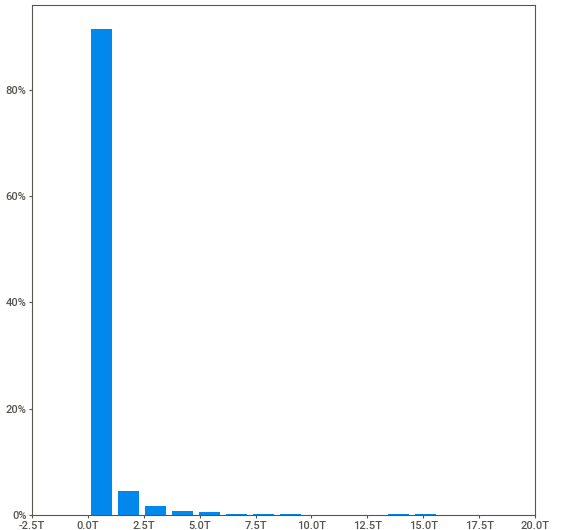
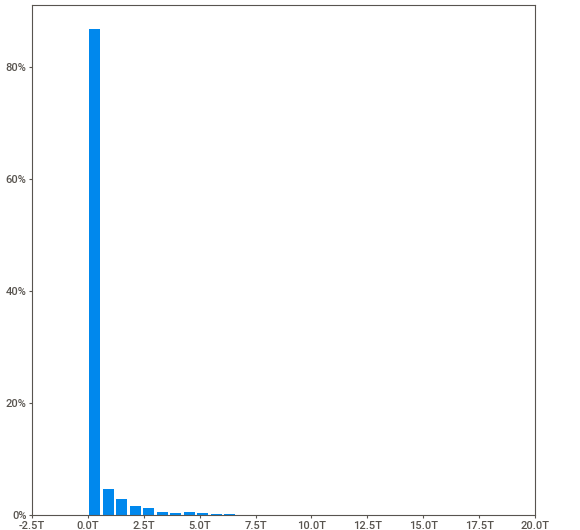
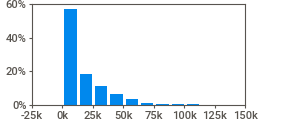
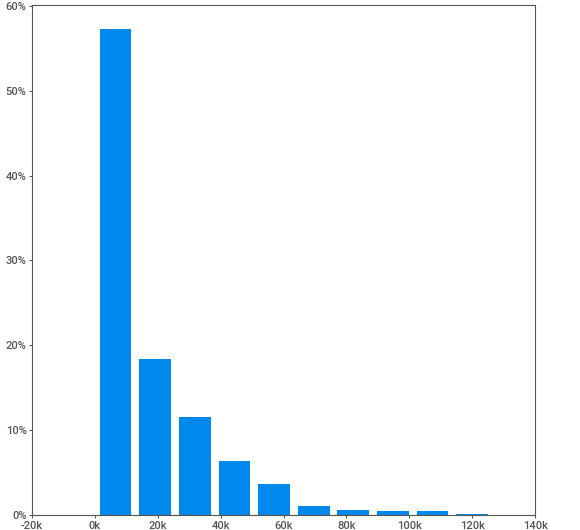
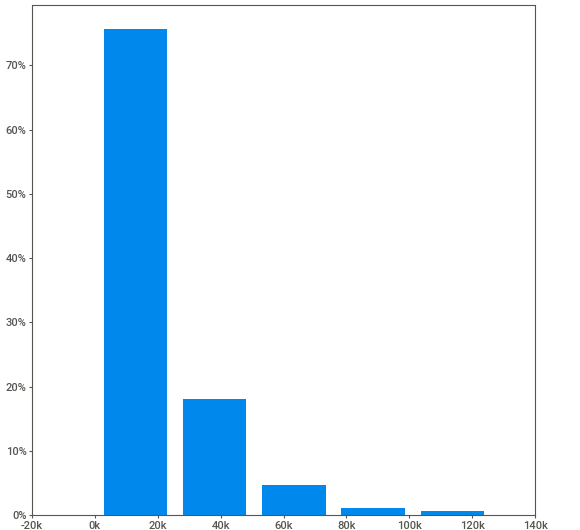
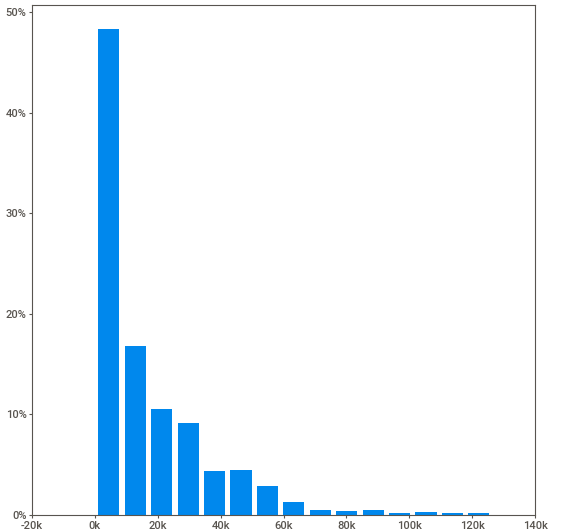
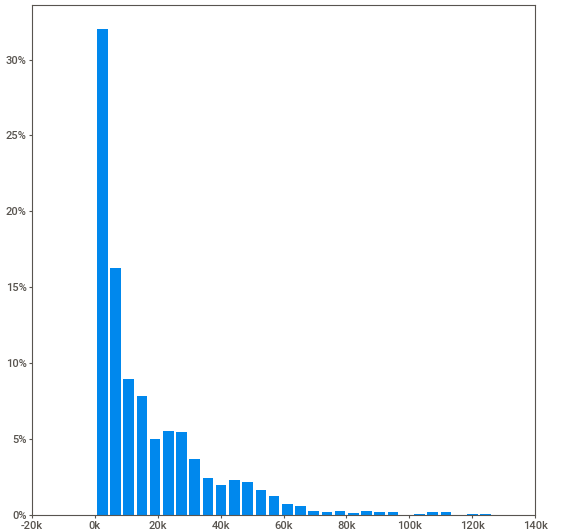
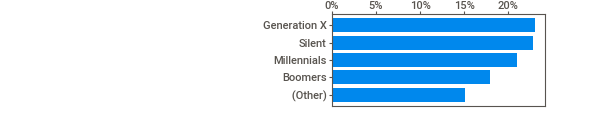
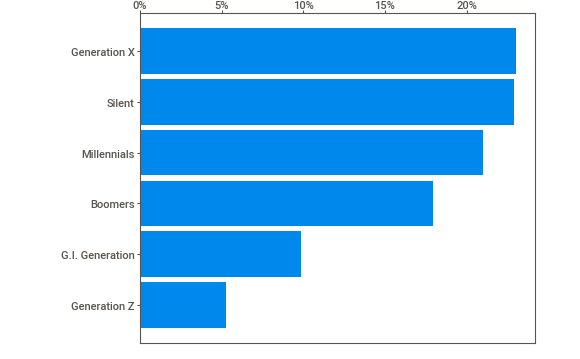
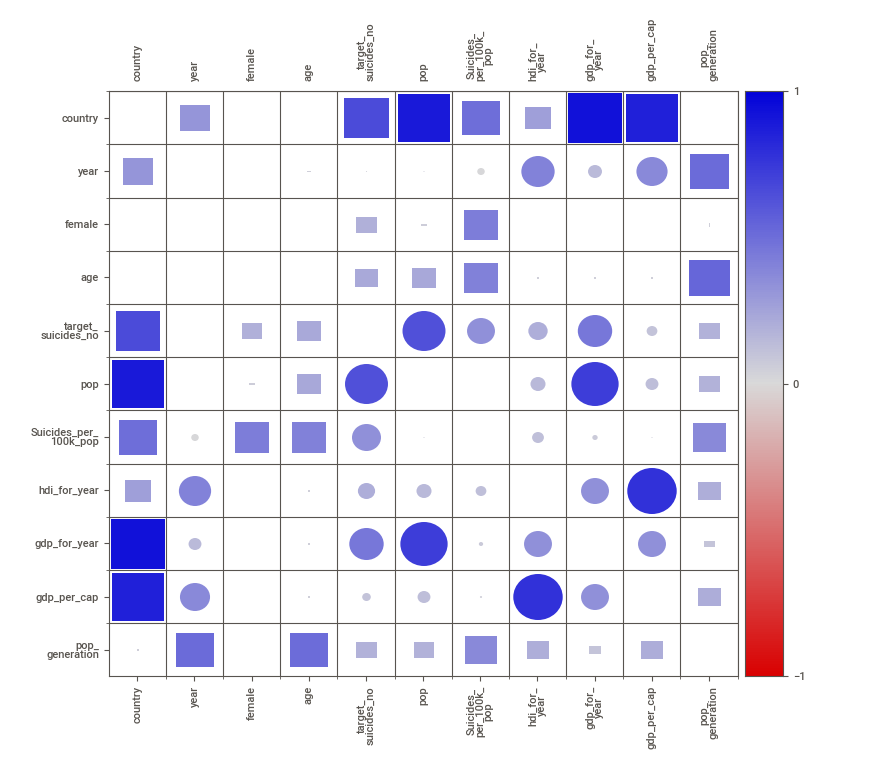
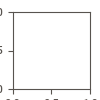

In [26]:
df1_report.show_notebook()

In [27]:
# Pearson correlation coefficients measure only linear relationships.
# Spearman correlation coefficients measure only monotonic relationships.

In [28]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
female,27820,2,False,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_suicides_no,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
pop,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
Suicides_per_100k_pop,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
hdi_for_year,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year,27820.0,NaN,NaN,NaN,445580969025.726624,1453609985940.91626,46919625.0,8985352832.0,48114688201.0,260202429150.0,18120714000000.0
gdp_per_cap,27820.0,NaN,NaN,NaN,16866.464414,18887.576472,251.0,3447.0,9372.0,24874.0,126352.0


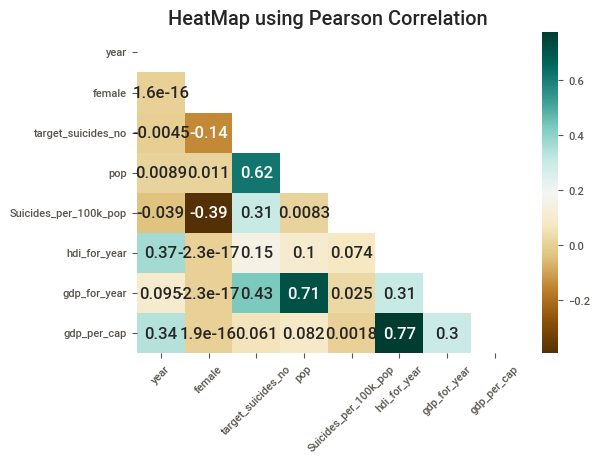

In [29]:
df1_corr_value=df1.corr(method='pearson',numeric_only=float)
sns.heatmap(data=df1_corr_value,cmap='BrBG',annot=True,mask=np.triu(np.ones_like(df1_corr_value)))
plt.xticks(rotation=45)
plt.title('HeatMap using Pearson Correlation')
plt.tight_layout()
plt.show()

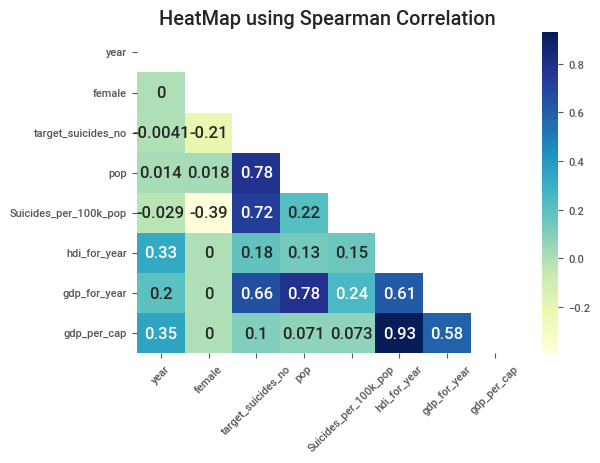

In [30]:
df1_corr_value=df1.corr(method='spearman',numeric_only=float)
sns.heatmap(data=df1_corr_value,cmap='YlGnBu',annot=True,mask=np.triu(np.ones_like(df1_corr_value)))
plt.xticks(rotation=45)
plt.title('HeatMap using Spearman Correlation')
plt.tight_layout()
plt.show()

### Task 3

In [31]:
df1.year.dtype

dtype('int64')

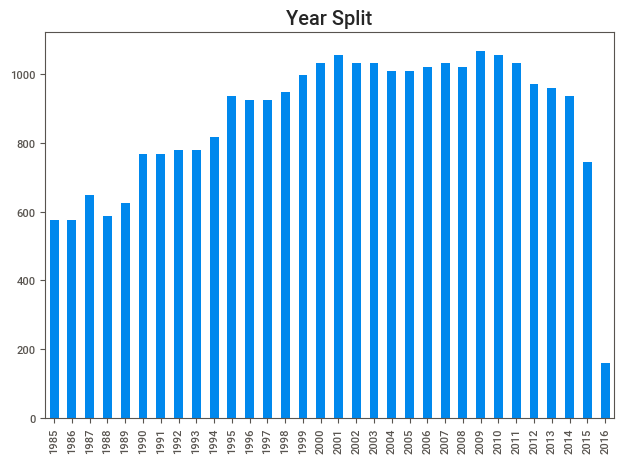

In [32]:
(
    pd.Categorical(
        values=df1['year'],
        categories=sorted(df1['year'].unique()),
        ordered=True,
        )
    ).value_counts().plot.bar()
plt.title('Year Split')
plt.tight_layout()
plt.show()

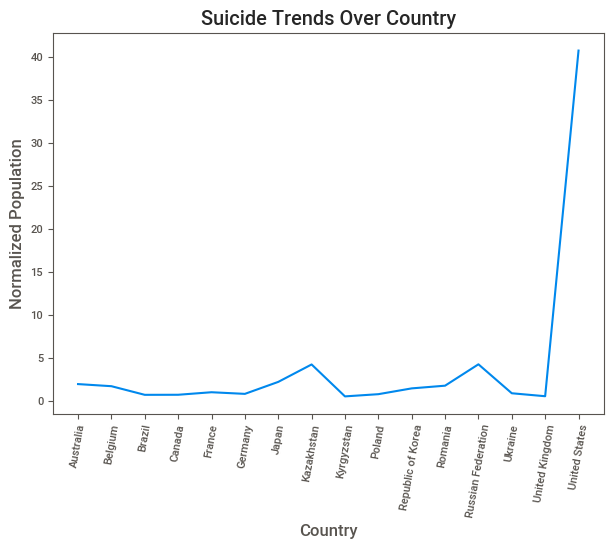

In [33]:
temp_df=df1.groupby(by=['country']).agg({'pop':'sum','target_suicides_no':'sum'}).reset_index()
temp_df['normalized']=temp_df['target_suicides_no'].div(df1['pop'])
temp_df.query(expr='normalized>0.49',inplace=True)
sns.lineplot(x=temp_df.country,y=temp_df.normalized,errorbar=None)
plt.title('Suicide Trends Over Country')
plt.xlabel('Country')
plt.ylabel('Normalized Population')
plt.tight_layout()
plt.xticks(rotation=80)
plt.show()

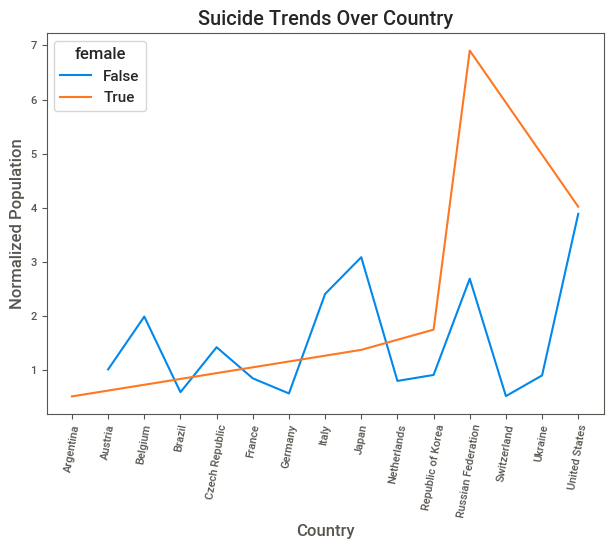

In [34]:
temp_df=df1.groupby(by=['country','female']).agg({'pop':'sum','target_suicides_no':'sum'}).reset_index()
temp_df['normalized']=temp_df['target_suicides_no'].div(df1['pop'])
temp_df.query(expr='normalized>0.49',inplace=True)
sns.lineplot(x=temp_df.country,y=temp_df.normalized,errorbar=None,hue=temp_df.female)
plt.title('Suicide Trends Over Country')
plt.xlabel('Country')
plt.ylabel('Normalized Population')
plt.tight_layout()
plt.xticks(rotation=80)
plt.show()

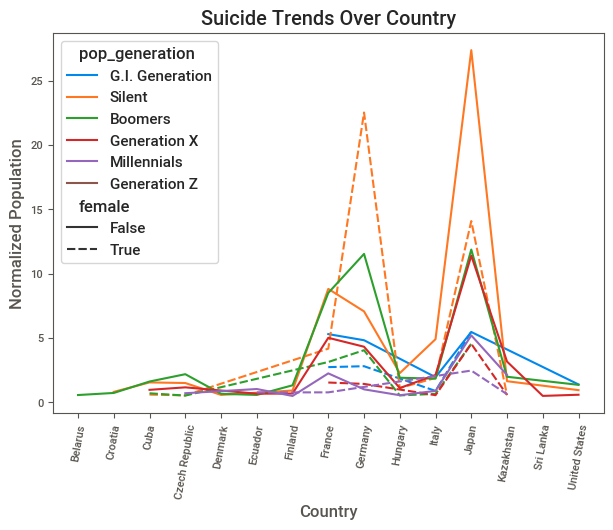

In [35]:
temp_df=df1.groupby(by=['country','female','pop_generation']).agg({'pop':'sum','target_suicides_no':'sum'}).reset_index()
temp_df['normalized']=temp_df['target_suicides_no'].div(df1['pop'])
temp_df.query(expr='normalized>0.49',inplace=True)
sns.lineplot(x=temp_df.country,y=temp_df.normalized,errorbar=None,hue=temp_df.pop_generation,style=temp_df.female)
plt.title('Suicide Trends Over Country')
plt.xlabel('Country')
plt.ylabel('Normalized Population')
plt.tight_layout()
plt.xticks(rotation=80)
plt.show()

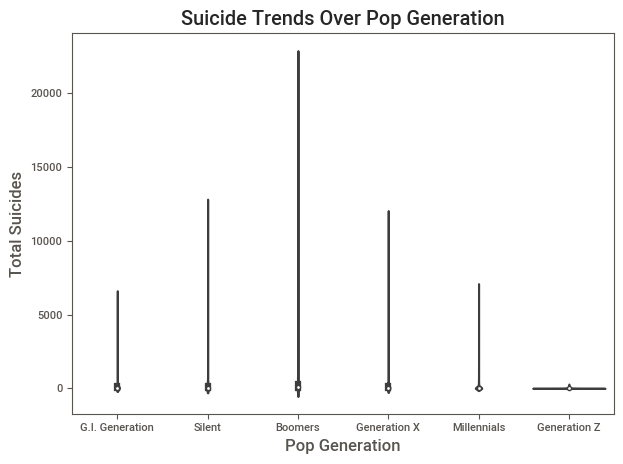

In [36]:
sns.violinplot(data=df1,y='target_suicides_no',x='pop_generation')
plt.title('Suicide Trends Over Pop Generation')
plt.ylabel('Total Suicides')
plt.xlabel('Pop Generation')
plt.tight_layout()
plt.show()

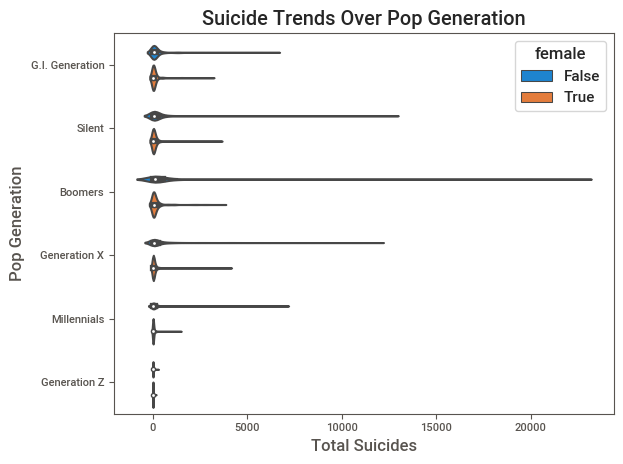

In [37]:
sns.violinplot(data=df1,x='target_suicides_no',y='pop_generation',hue='female')
plt.title('Suicide Trends Over Pop Generation')
plt.xlabel('Total Suicides')
plt.ylabel('Pop Generation')
plt.tight_layout()
plt.show()

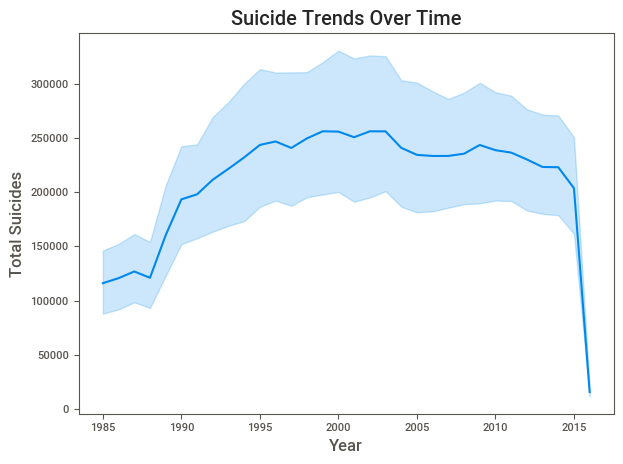

In [38]:
sns.lineplot(x='year',y='target_suicides_no',data=df1,estimator='sum')
plt.title('Suicide Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.tight_layout()
plt.show()

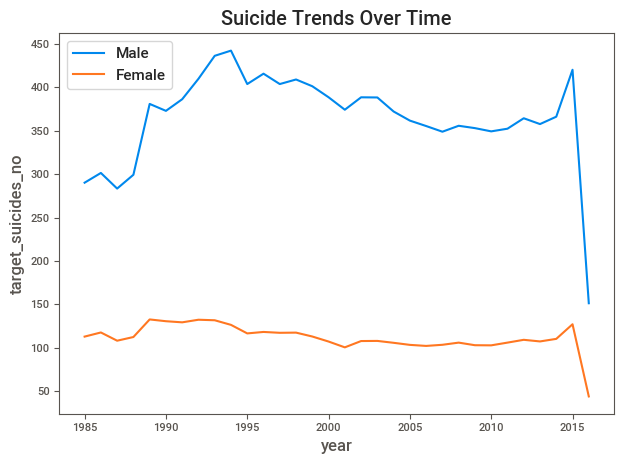

In [39]:
sns.lineplot(x=df1[df1['female']==False].year,y=df1[df1['female']==False].target_suicides_no,errorbar=None)
sns.lineplot(x=df1[df1['female']==True].year,y=df1[df1['female']==True].target_suicides_no,errorbar=None)
plt.legend(['Male','Female'])
plt.title('Suicide Trends Over Time')
plt.tight_layout()
plt.show()

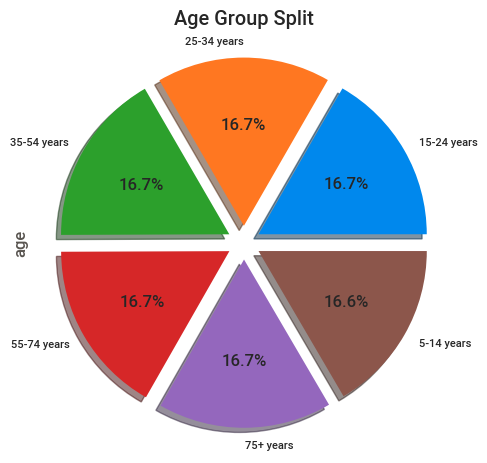

In [40]:
df1['age'].value_counts().plot.pie(explode=[0.1]*df1['age'].nunique(),autopct='%1.1f%%',shadow=True)
plt.title('Age Group Split')
plt.tight_layout()
plt.show()

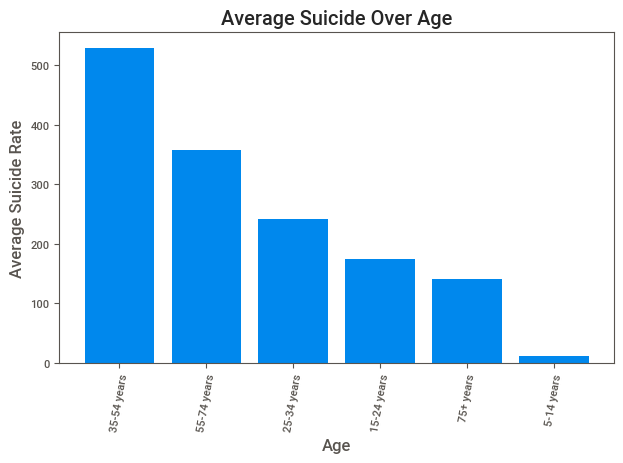

In [41]:
temp_df=df1.groupby(by=['age'])['target_suicides_no'].mean()
temp_df=temp_df.sort_values(ascending=False)
plt.bar(temp_df.index,temp_df.values)
plt.xlabel('Age')
plt.ylabel('Average Suicide Rate')
plt.title('Average Suicide Over Age')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

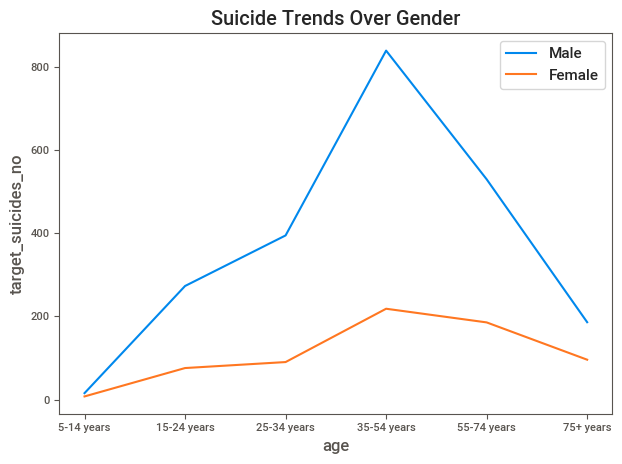

In [42]:
sns.lineplot(x=df1[df1['female']==False].age,y=df1[df1['female']==False].target_suicides_no,errorbar=None)
sns.lineplot(x=df1[df1['female']==True].age,y=df1[df1['female']==True].target_suicides_no,errorbar=None)
plt.legend(['Male','Female'])
plt.title('Suicide Trends Over Gender')
plt.tight_layout()
plt.show()

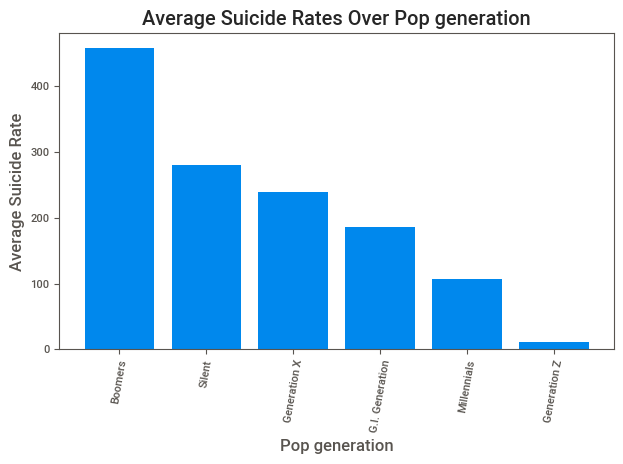

In [43]:
temp_df=df1.groupby(by=['pop_generation'])['target_suicides_no'].mean()
temp_df=temp_df.sort_values(ascending=False)
plt.bar(temp_df.index,temp_df.values)
plt.xlabel('Pop generation')
plt.ylabel('Average Suicide Rate')
plt.title('Average Suicide Rates Over Pop generation')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

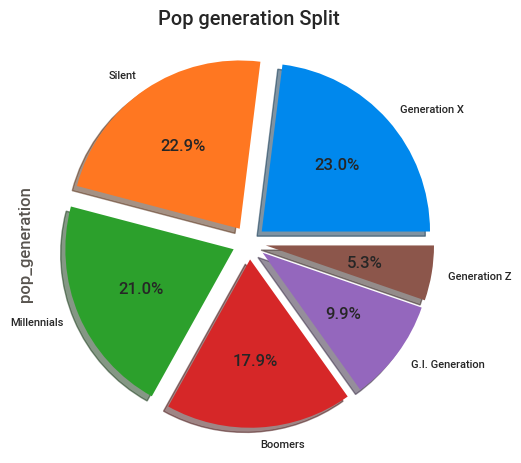

In [44]:
df1['pop_generation'].value_counts().plot.pie(explode=[0.1]*df1['pop_generation'].nunique(),autopct='%1.1f%%',shadow=True)
plt.title('Pop generation Split')
plt.tight_layout()
plt.show()

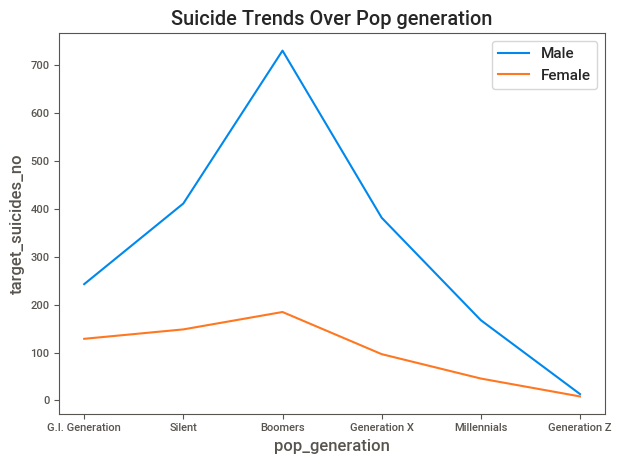

In [45]:
sns.lineplot(x=df1[df1['female']==False].pop_generation,y=df1[df1['female']==False].target_suicides_no,errorbar=None)
sns.lineplot(x=df1[df1['female']==True].pop_generation,y=df1[df1['female']==True].target_suicides_no,errorbar=None)
plt.legend(['Male','Female'])
plt.title('Suicide Trends Over Pop generation')
plt.tight_layout()
plt.show()

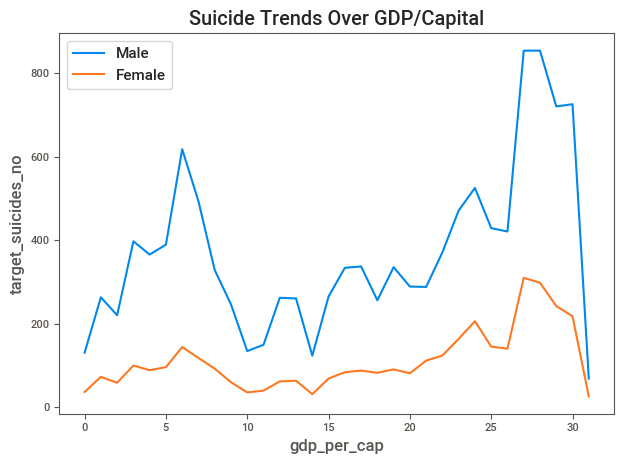

In [46]:
sns.lineplot(x=pd.qcut(x=df1[df1['female']==False].gdp_per_cap,q=32,labels=False),y=df1[df1['female']==False].target_suicides_no,errorbar=None)
sns.lineplot(x=pd.qcut(x=df1[df1['female']==True].gdp_per_cap,q=32,labels=False),y=df1[df1['female']==True].target_suicides_no,errorbar=None)
plt.legend(['Male','Female'])
plt.title('Suicide Trends Over GDP/Capital')
plt.tight_layout()
plt.show()

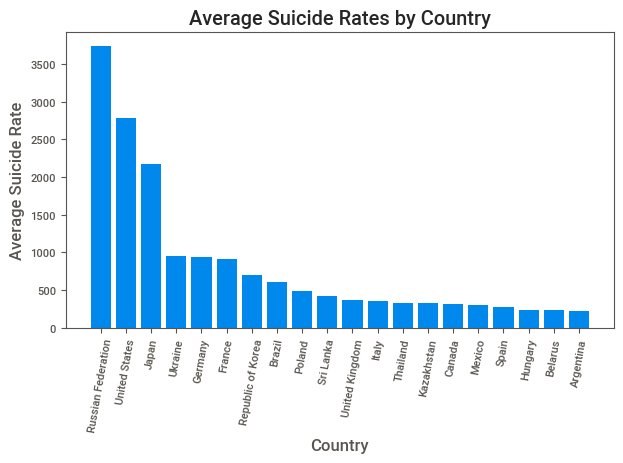

In [47]:
temp_df=df1.groupby(by=['country'])['target_suicides_no'].mean()
temp_df=temp_df.sort_values(ascending=False)
plt.bar(temp_df.iloc[:20].index,temp_df.iloc[:20].values)
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate')
plt.title('Average Suicide Rates by Country')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

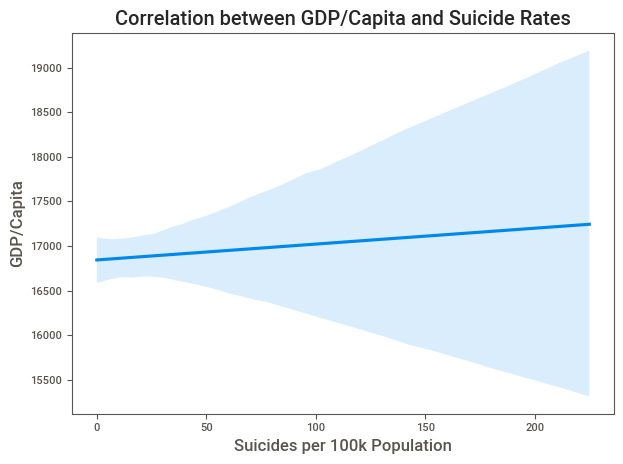

In [48]:
sns.regplot(x='Suicides_per_100k_pop',y='gdp_per_cap',data=df1,scatter=False)
plt.title('Correlation between GDP/Capita and Suicide Rates')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('GDP/Capita')
plt.tight_layout()
plt.show()

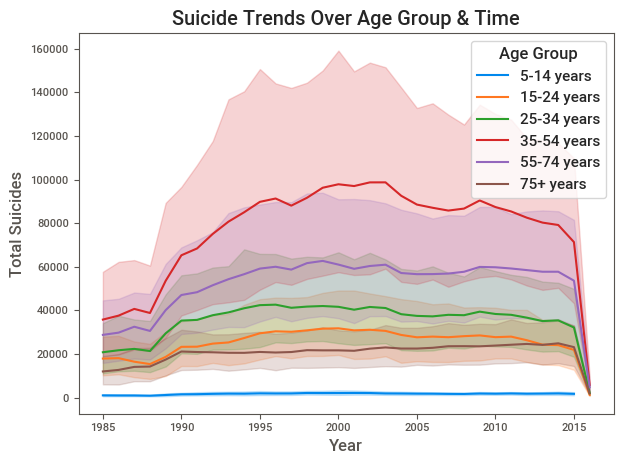

In [49]:
sns.lineplot(x='year',y='target_suicides_no',hue='age',data=df1,estimator='sum')
plt.title('Suicide Trends Over Age Group & Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()